In [1]:
include("./common.jl")

Common libraries imported and functions defined


## Discrete-Time Sinusoid

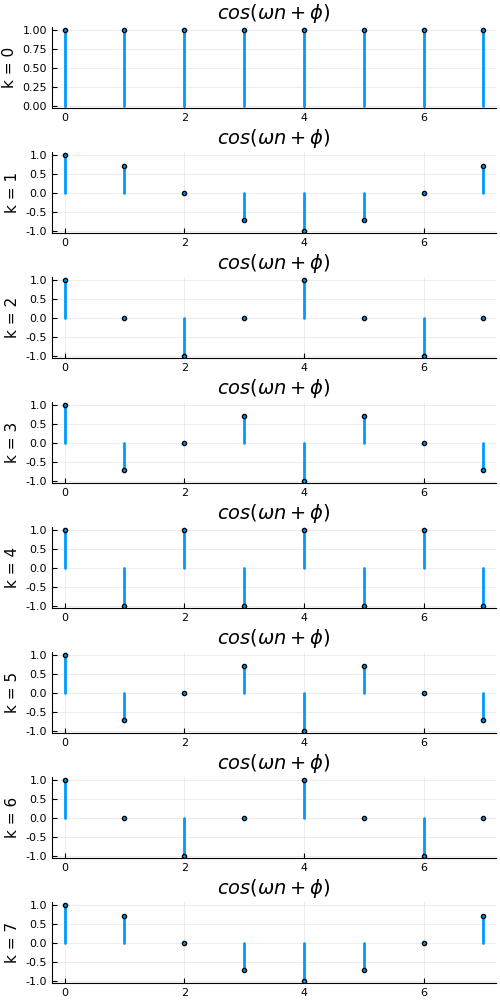

In [79]:
M = 8
N = 8
n = 0:M-1
xs = Array{Float64, 2}(M, 0)
yls = Array{String, 2}(1, M)
for k = 0:M-1
    ω = 2π * k / N
    ϕ = 0
    x = cos.(ω .* n + ϕ)
    xs = hcat(xs, x)
    l = "k = $k"
    yls[1, k+1] = l
end

stem(n, xs, layout=(8,1), size=(500,1000), ylabel=yls, title=L"$cos(\omega n + \phi)$")

In [17]:
xs

8×8 Array{Float64,2}:
 1.0   1.0           1.0           1.0          …   1.0           1.0        
 1.0   0.707107      6.12323e-17  -0.707107        -1.83697e-16   0.707107   
 1.0   6.12323e-17  -1.0          -1.83697e-16     -1.0          -4.28626e-16
 1.0  -0.707107     -1.83697e-16   0.707107         5.51091e-16  -0.707107   
 1.0  -1.0           1.0          -1.0              1.0          -1.0        
 1.0  -0.707107      3.06162e-16   0.707107     …  -2.69484e-15  -0.707107   
 1.0  -1.83697e-16  -1.0           5.51091e-16     -1.0          -4.90478e-16
 1.0   0.707107     -4.28626e-16  -0.707107        -4.90478e-16   0.707107   

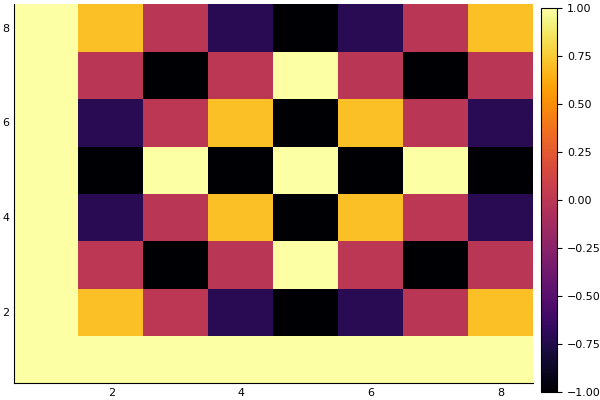

In [20]:
heatmap(xs)

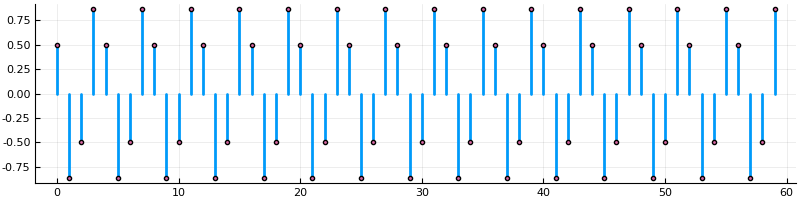

In [53]:
M = 60
k = 4
N = 16
n = 0:M-1
ω = 2π * k / N + 0π
ϕ = π / 3
x = cos.( ω .* n + ϕ)
stem(n, x, size=(800,200))

## Complex Exponential

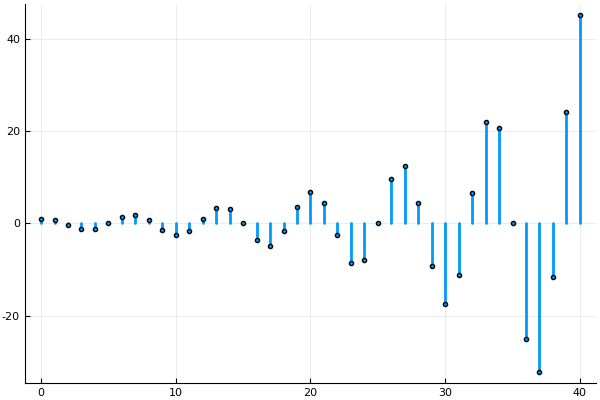

In [84]:
n = 0:40
z = 1.1 * exp(0.3 * π * im)
x = z.^n
stem(n, real(x))

## Signals are Vectors

In [49]:
using PortAudio
using LibSndFile

In [3]:
stream = PortAudioStream()

PortAudio.PortAudioStream{Float32}
  Samplerate: 44100.0Hz
  Buffer Size: 4096 frames
  2 channel sink: "default"
  2 channel source: "default"

In [58]:
N = 387041

387041

In [59]:
# Sine wave
n = 0:N-1
sinewave = 0.5 * cos.(2π / 200 * n)
write(stream, sinewave)

387041

In [60]:
# Chirp
chirp = 0.2 * cos.(2π / 3000000 * n.^2)
write(stream, chirp)

387041

In [61]:
# White guassion noise
noise = 0.05 * randn(N, 1)
write(stream, noise)

387041

In [ ]:
# wav file downloaded from https://github.com/JuliaAudio/JuliaAudioExamples
snd = load("lifebacktomusic_loop.wav")
track = snd.data[:,2]

In [75]:
write(stream, track)

387041

In [63]:
size(sinewave), size(track)

((387041,), (387041,))

In [67]:
merged = chirp .+ track
merged = merged * 0.5
write(stream, merged)

387041

In [ ]:
X = [track sinewave chirp noise]

In [73]:
a = [1, 0, 0, 0]
A = X * a
write(stream, A)

387041

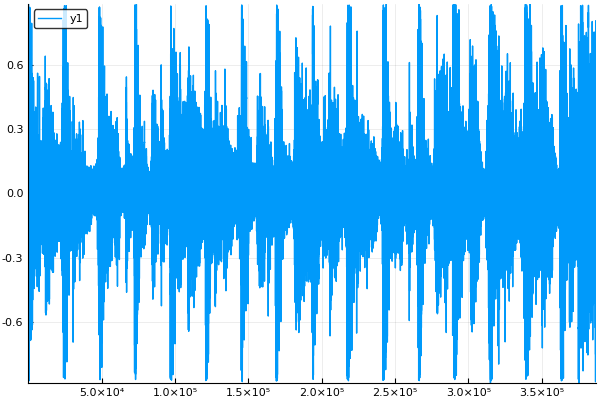

In [79]:
plot(track)

In [81]:
norm(track), norm(sinewave), norm(chirp), norm(noise)

(136.32297f0, 219.95750933603682, 88.01674723011702, 31.0838738975433)